In [2]:
from google.colab import files
uploaded = files.upload()


Saving Skin_Type_OG.csv to Skin_Type_OG (1).csv


ANALISIS DATA
Kolom yang tersedia:
['Age', 'Gender', 'Hydration_Level', 'Oil_Level', 'Sensitivity', 'Humidity', 'Temperature', 'Skin_Type']

Jumlah baris: 2000
Jumlah kolom: 8

   Age  Gender Hydration_Level Oil_Level Sensitivity  Humidity  Temperature  \
0   36    Male             Low       Low        High      31.9         10.1   
1   36  Female            High       Low        High      30.1         20.5   
2   34  Female            High    Medium         Low      53.0         19.5   
3   51    Male          Medium      High         Low      57.3         22.7   
4   36    Male            High    Medium      Medium      64.4         24.0   

     Skin_Type  
0          Dry  
1  Combination  
2       Normal  
3         Oily  
4       Normal  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2000 non-nu

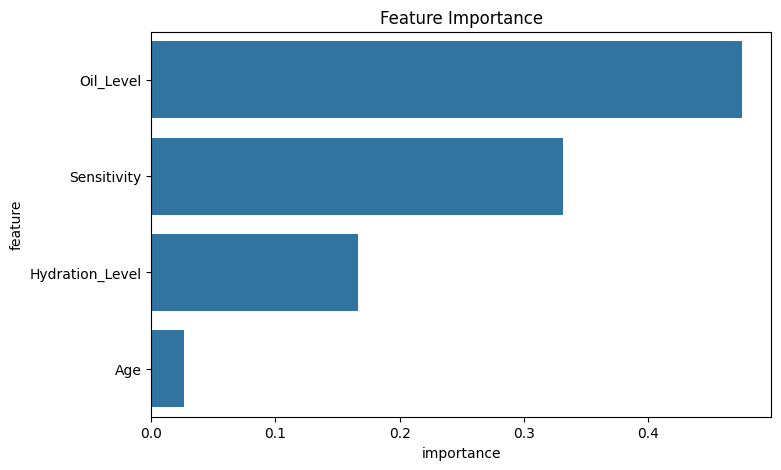

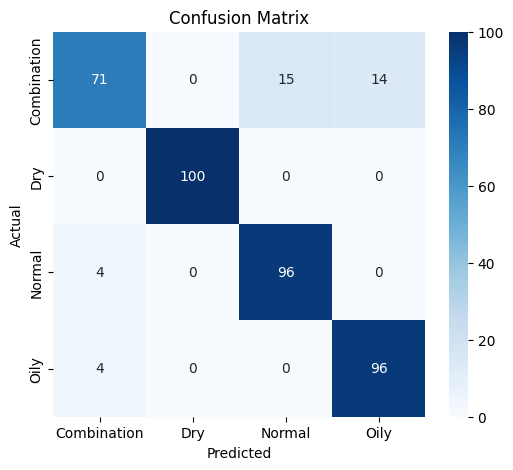

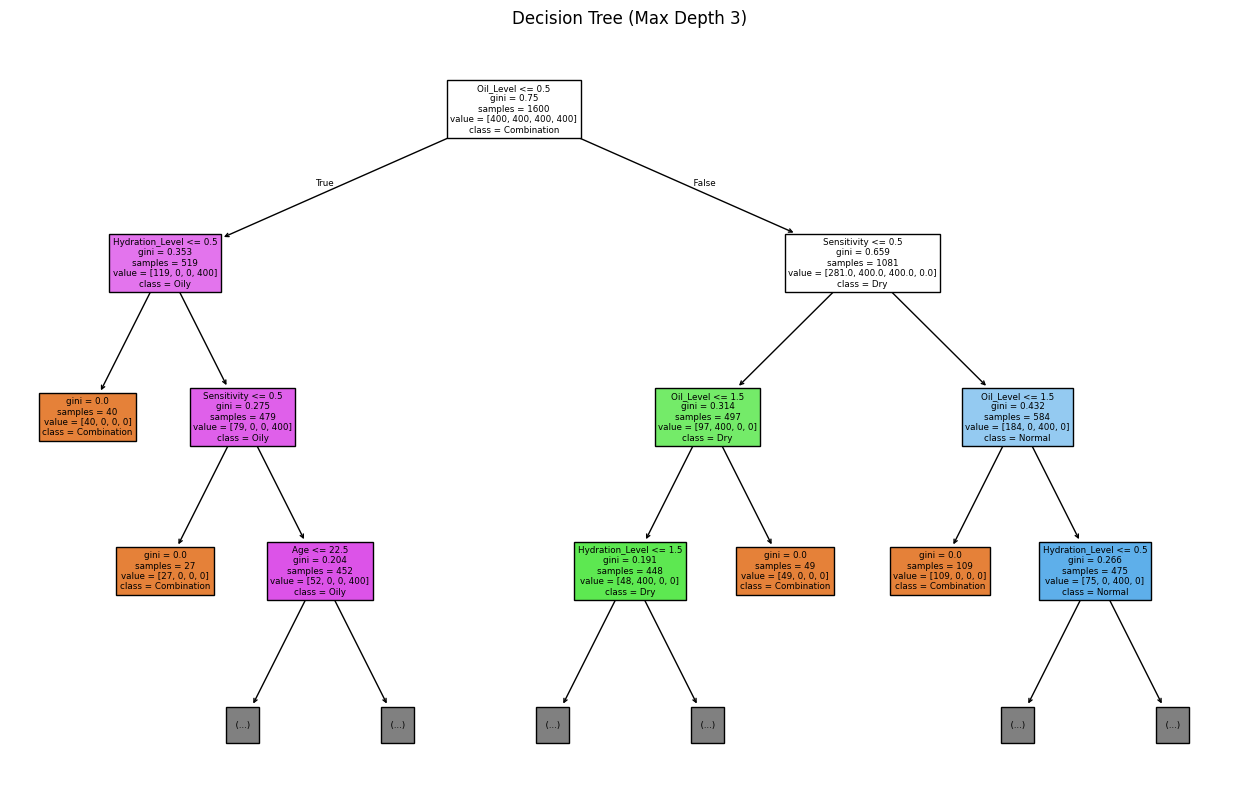


CONTOH PREDIKSI + REKOMENDASI SKINCARE

Sample 16:
  Hydration_Level: Medium
  Oil_Level: High
  Sensitivity: Low
  Age: 39
  Prediksi: Oily
  Aktual: Oily
  Benar: ✓
  Rekomendasi Skincare: Gunakan gel-based cleanser, toner bebas alkohol, dan oil-free moisturizer.

Sample 519:
  Hydration_Level: Medium
  Oil_Level: Medium
  Sensitivity: Low
  Age: 46
  Prediksi: Normal
  Aktual: Normal
  Benar: ✓
  Rekomendasi Skincare: Gunakan basic skincare rutin: gentle cleanser, moisturizer ringan, dan sunscreen.

Sample 1840:
  Hydration_Level: Medium
  Oil_Level: Medium
  Sensitivity: Medium
  Age: 41
  Prediksi: Normal
  Aktual: Combination
  Benar: ✗
  Rekomendasi Skincare: Gunakan basic skincare rutin: gentle cleanser, moisturizer ringan, dan sunscreen.

Sample 482:
  Hydration_Level: High
  Oil_Level: Low
  Sensitivity: Medium
  Age: 19
  Prediksi: Combination
  Aktual: Combination
  Benar: ✓
  Rekomendasi Skincare: Gunakan produk kombinasi: hydrating serum di area kering, oil-control di ar

In [5]:
# Import Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

#  Baca Dataset
filename = next(iter(uploaded))
data = pd.read_csv(filename)

# Analisis Data
print("=" * 50)
print("ANALISIS DATA")
print("=" * 50)
print("Kolom yang tersedia:")
print(data.columns.tolist())
print(f"\nJumlah baris: {len(data)}")
print(f"Jumlah kolom: {len(data.columns)}\n")
print(data.head())
print("\nInfo dataset:")
print(data.info())
print("\nCek missing values:")
print(data.isnull().sum())

# Kolom yang dipakai
required_features = ['Hydration_Level', 'Oil_Level', 'Sensitivity', 'Age']
required_target = 'Skin_Type'

# Cek fitur
available_features = []
missing_features = []

for feature in required_features:
    if feature in data.columns:
        available_features.append(feature)
    else:
        missing_features.append(feature)

if required_target not in data.columns:
    print(f"\nKolom target '{required_target}' tidak ditemukan!")
    print("Kolom yang tersedia:", data.columns.tolist())
    raise SystemExit

if missing_features:
    print(f"\nKolom features yang hilang: {missing_features}")
    raise SystemExit

# proprocessing
print("\n" + "="*50)
print("PREPROCESSING DATA")
print("="*50)

X = data[available_features].copy()
y = data[required_target].copy()

print("Distribusi target variable:")
print(y.value_counts())

print(f"\nMissing values di features: {X.isnull().sum().sum()}")
print(f"Missing values di target: {y.isnull().sum()}")

# Isi missing values jika ada
for col in X.columns:
    if X[col].isnull().sum() > 0:
        if X[col].dtype == 'object':
            X[col].fillna(X[col].mode()[0], inplace=True)
        else:
            X[col].fillna(X[col].median(), inplace=True)

# Encoding
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
        print(f"Encoding '{col}': {dict(zip(le.classes_, le.transform(le.classes_)))}")

target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)
print(f"\nTarget mapping: {dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")

print(f"\nFinal dataset shape: {X.shape}")
print("Features setelah preprocessing:")
print(X.head())

# training
print("\n" + "="*50)
print("TRAINING MODEL")
print("="*50)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)
model.fit(X_train, y_train)
print("Model berhasil dilatih!")

# evaluasi
print("\n" + "="*50)
print("EVALUASI MODEL")
print("="*50)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2%}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': available_features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualisasi
print("\n" + "="*50)
print("VISUALISASI")
print("="*50)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualisasi Decision Tree (max depth 3)
plt.figure(figsize=(16, 10))
tree.plot_tree(model,
               feature_names=available_features,
               class_names=target_encoder.classes_,
               filled=True,
               max_depth=3)
plt.title('Decision Tree (Max Depth 3)')
plt.show()

# Rekomendasi Skincare
rekomendasi_skincare = {
    "Dry": "Gunakan hydrating toner, moisturizer berbasis krim, dan facial wash yang gentle.",
    "Oily": "Gunakan gel-based cleanser, toner bebas alkohol, dan oil-free moisturizer.",
    "Normal": "Gunakan basic skincare rutin: gentle cleanser, moisturizer ringan, dan sunscreen.",
    "Combination": "Gunakan produk kombinasi: hydrating serum di area kering, oil-control di area T-zone."
}

# Contoh Prediksi
print("\n" + "="*50)
print("CONTOH PREDIKSI + REKOMENDASI SKINCARE")
print("="*50)

sample_indices = np.random.choice(X_test.index, min(5, len(X_test)), replace=False)

for idx in sample_indices:
    sample_features = X_test.loc[[idx]]
    prediction = model.predict(sample_features)
    predicted_class = target_encoder.inverse_transform(prediction)[0]
    actual_class = target_encoder.inverse_transform([y_test[X_test.index.get_loc(idx)]])[0]

    print(f"\nSample {idx}:")
    for i, feature in enumerate(available_features):
        if feature in label_encoders:
            original_value = label_encoders[feature].inverse_transform([sample_features.iloc[0, i]])[0]
            print(f"  {feature}: {original_value}")
        else:
            print(f"  {feature}: {sample_features.iloc[0, i]}")
    print(f"  Prediksi: {predicted_class}")
    print(f"  Aktual: {actual_class}")
    print(f"  Benar: {'✓' if predicted_class == actual_class else '✗'}")
    print(f"  Rekomendasi Skincare: {rekomendasi_skincare.get(predicted_class, '-')}")


